Offshore Gauge 

<Figure size 1000x800 with 0 Axes>

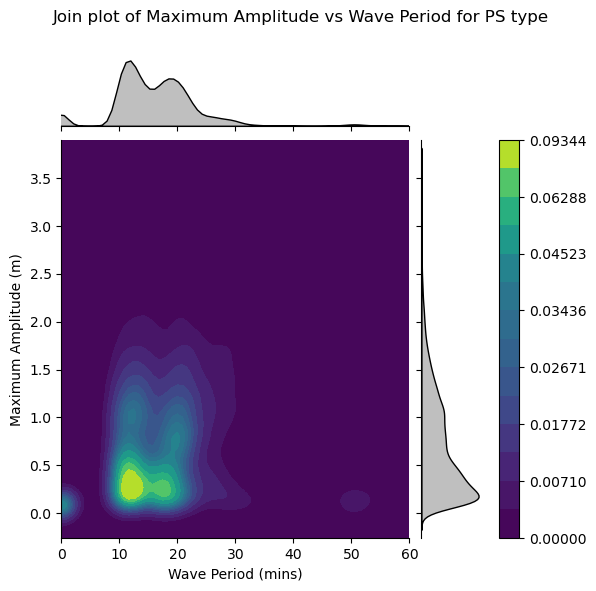

<Figure size 1000x800 with 0 Axes>

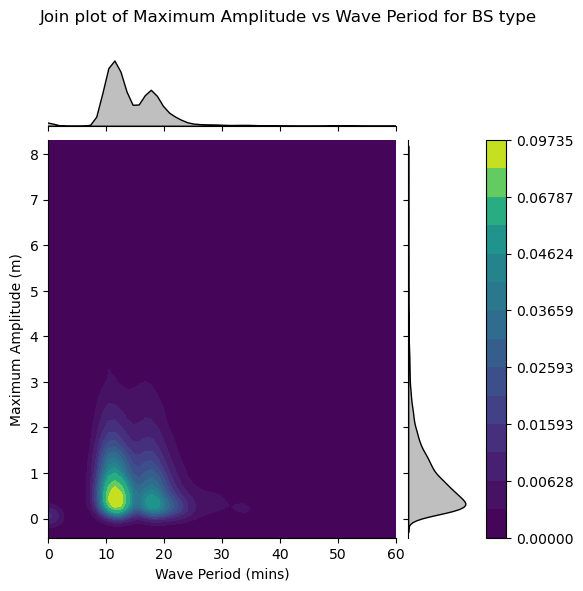

<Figure size 1000x800 with 0 Axes>

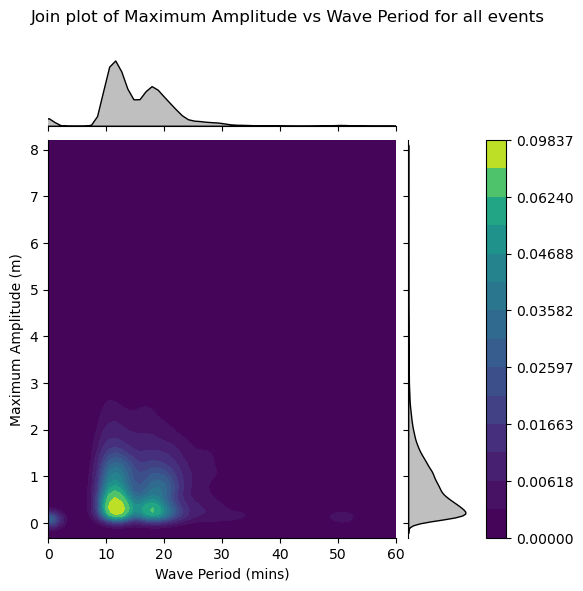

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Load data from your selected station
max_amp_file = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/grid0_allpts87_alleve53550.offshore.txt'
waveperiod_file = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/grid0_allpts87_alleveWP53550.offshore.txt'

df_amp = pd.read_csv(max_amp_file, sep='\t')
df_wp = pd.read_csv(waveperiod_file, sep='\t')

st = 54 #38 for CT and 54 for SR

# Extract the data for the selected station
id = df_amp.iloc[:, 0]
max_amp = df_amp.iloc[:, st]
waveperiod = df_wp.iloc[:, st]

# Create a DataFrame for the selected station
df = pd.DataFrame({'id': id, 'max_amp': max_amp, 'waveperiod': waveperiod})

# Split the first 2 characters of id into a new column 'type'
df['type'] = df['id'].str[:2]

# Define the number of bins for your heatmap
num_bins = 15

# Create a heatmap for each 'type' using hue as quantiles
types = ['PS', 'BS']
for type in types:
    station_df = df[df['type'] == type]
    station_df = station_df[['max_amp', 'waveperiod']]
    
    plt.figure(figsize=(10, 8))
    kdeplot = sns.jointplot(station_df, x='waveperiod', y='max_amp', kind='kde', color='k', fill=True, thresh=0, levels=num_bins, cmap='viridis', cbar=True)
    # Move colorbar to the right
    plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
    # get the current positions of the joint ax and the ax for the marginal x
    pos_joint_ax = kdeplot.ax_joint.get_position()
    pos_marg_x_ax = kdeplot.ax_marg_x.get_position()
    # reposition the joint ax so it has the same width as the marginal x ax
    kdeplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])
    # reposition the colorbar using new x positions and y positions of the joint ax
    kdeplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])
    kdeplot.fig.suptitle('Join plot of Maximum Amplitude vs Wave Period for ' + type + ' type')
    plt.xlim(0, 60)
    plt.xlabel('Wave Period (mins)')
    plt.ylabel('Maximum Amplitude (m)')
    plt.show()

# Create a heatmap for all 'types' with color split across quantiles
plt.figure(figsize=(10, 8))
all_types_df = df
kdeplot = sns.jointplot(all_types_df, x='waveperiod', y='max_amp', kind='kde', color='k', fill=True, thresh=0, levels=num_bins, cmap='viridis', cbar=True)
# Move colorbar to the right
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
# get the current positions of the joint ax and the ax for the marginal x
pos_joint_ax = kdeplot.ax_joint.get_position()
pos_marg_x_ax = kdeplot.ax_marg_x.get_position()
# reposition the joint ax so it has the same width as the marginal x ax
kdeplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])
# reposition the colorbar using new x positions and y positions of the joint ax
kdeplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])
kdeplot.fig.suptitle('Join plot of Maximum Amplitude vs Wave Period for all events')
plt.xlim(0, 60)
plt.xlabel('Wave Period (mins)')
plt.ylabel('Maximum Amplitude (m)')
plt.show()


<Figure size 1000x800 with 0 Axes>

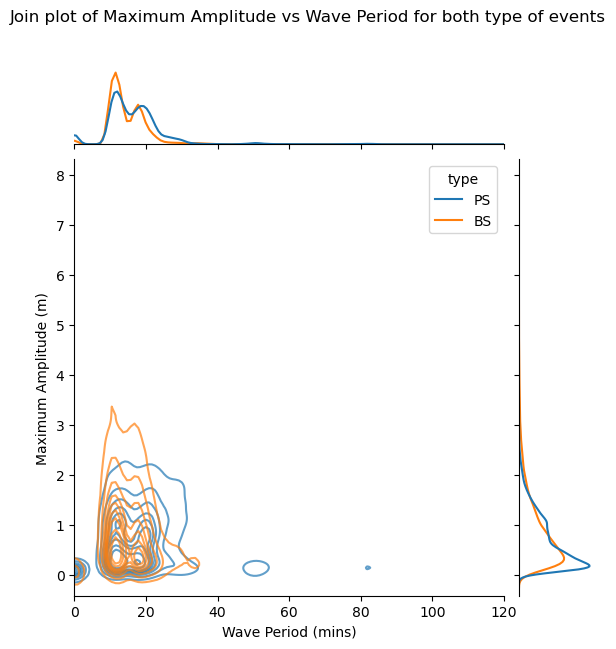

In [15]:
# Create a heatmap for all 'types' with color split across quantiles
plt.figure(figsize=(10, 8))
all_types_df = df
kdeplot = sns.jointplot(all_types_df, x='waveperiod', y='max_amp',hue="type",kind='kde', color='k', alpha = 0.7)
plt.xlim(0, 120)
plt.xlabel('Wave Period (mins)')
plt.ylabel('Maximum Amplitude (m)')
kdeplot.fig.suptitle('Join plot of Maximum Amplitude vs Wave Period for both type of events', y=1.075)
plt.show()

Amp factor from offshore statistics and onshore statistics

<Figure size 1000x800 with 0 Axes>

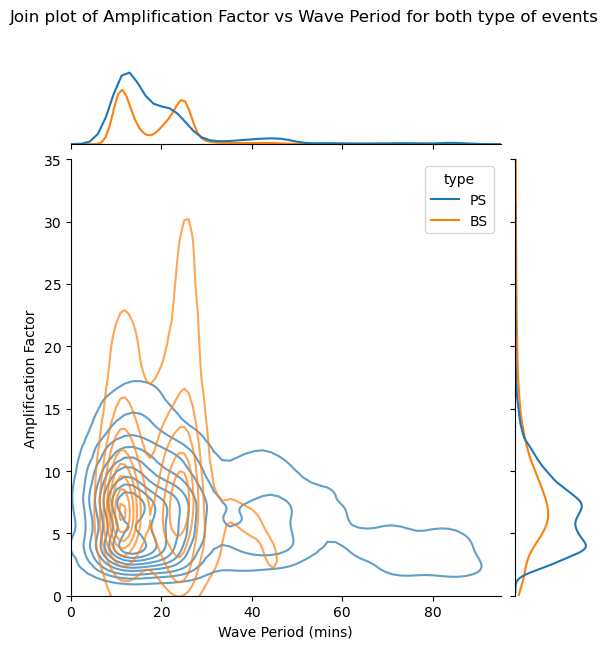

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Load data from your selected station
max_amp_file = '//mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/grid0_allpts87_alleve53550.offshore.txt'
waveperiod_file = '//mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/grid0_allpts87_alleveWP53550.offshore.txt'
max_ht_file = '//mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/CHeight_SR_alleve53550.onshore.txt'

df_amp = pd.read_csv(max_amp_file, sep='\t')
df_wp = pd.read_csv(waveperiod_file, sep='\t')
df_ht = pd.read_csv(max_ht_file, sep='\t')

st = 38 #38 for CT and 54 for SR

# Extract the data for the selected station
id = df_amp.iloc[:, 0]
max_amp = df_amp.iloc[:, st]
waveperiod = df_wp.iloc[:, st]
max_ht = df_ht['hmax']
#abs max of dzmin or dzmax
max_adz = df_ht[['dzmax', 'dzmin']].abs().max(axis=1)

# Create a DataFrame for the selected station
df = pd.DataFrame({'id': id, 'max_amp': max_amp, 'waveperiod': waveperiod, 'max_ht': max_ht, 'max_adz': max_adz})

# Split the first 2 characters of id into a new column 'type'
df['type'] = df['id'].str[:2]
df['amp_factor'] = df['max_ht']/df['max_amp']

#filter events with max_adz < 0.1
df = df[df['max_adz'] < 0.1]
df = df[df['max_amp'] > 0.1]

#filter based on polarity

num_bins = 15
# #plot jointplot of amp_factor for each type wrt waveperiod
# types = ['PS', 'BS']
# for type in types:
#     station_df = df[df['type'] == type]
#     station_df = station_df[['waveperiod', 'amp_factor']]
#     plt.figure(figsize=(10, 8))
#     kdeplot = sns.jointplot(station_df, x='waveperiod', y='amp_factor', kind='kde', color='k', fill=True, thresh=0, levels=num_bins, cmap='viridis', cbar=True)
#     # Move colorbar to the right
#     plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
#     # get the current positions of the joint ax and the ax for the marginal x
#     pos_joint_ax = kdeplot.ax_joint.get_position()
#     pos_marg_x_ax = kdeplot.ax_marg_x.get_position()
#     # reposition the joint ax so it has the same width as the marginal x ax
#     kdeplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])
#     # reposition the colorbar using new x positions and y positions of the joint ax
#     kdeplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])
#     kdeplot.fig.suptitle('Join plot of Amplification Factor vs Wave Period for ' + type + ' type')
#     plt.xlim(0, 60)
#     plt.ylim(0, 20)
#     plt.xlabel('Wave Period (mins)')
#     plt.ylabel('Amplification Factor')
#     plt.show()

# # Create a heatmap for all 'types' with color split across quantiles
# plt.figure(figsize=(10, 8))
# all_types_df = df
# kdeplot = sns.jointplot(all_types_df, x='waveperiod', y='amp_factor', kind='kde', color='k', fill=True, thresh=0, levels=num_bins, cmap='viridis', cbar=True)
# # Move colorbar to the right
# plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
# # get the current positions of the joint ax and the ax for the marginal x
# pos_joint_ax = kdeplot.ax_joint.get_position()
# pos_marg_x_ax = kdeplot.ax_marg_x.get_position()
# # reposition the joint ax so it has the same width as the marginal x ax
# kdeplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])
# # reposition the colorbar using new x positions and y positions of the joint ax
# kdeplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])
# kdeplot.fig.suptitle('Join plot of Amplification Factor vs Wave Period for all events')
# plt.xlim(0, 60)
# plt.ylim(0, 20)
# plt.xlabel('Wave Period (mins)')
# plt.ylabel('Amplification Factor')
# plt.show()

# Create a heatmap for all 'types' with color split across quantiles
plt.figure(figsize=(10, 8))
all_types_df = df
kdeplot = sns.jointplot(all_types_df, x='waveperiod', y='amp_factor',hue="type",kind='kde', color='k', alpha = 0.7)
plt.xlim(0, 95)
plt.ylim(0, 35)
plt.xlabel('Wave Period (mins)')
plt.ylabel('Amplification Factor')
kdeplot.fig.suptitle('Join plot of Amplification Factor vs Wave Period for both type of events', y=1.075)
plt.show()

Polarity

In [ ]:
file = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/old/PS_manning003/E01517N3917E01678N3772-PS-Mur_PNo_Hom-M792_E01620N3835_S000/grid0_ts.nc'
import xarray as xr
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#read data
data = xr.open_dataset(file)
depth = data['deformed_bathy'].values
ts = data['eta'].values
maxTS = ts.max(axis=0)
minTS = ts.min(axis=0)
gperiod = []
gpolarity = []
greturn_code = []

for g in range(87):
    #find peaks(positive and negative)
    ppeaks, _ = scipy.signal.find_peaks(ts[:,g], height=0.05,distance=50)
    npeaks, _ = scipy.signal.find_peaks(-ts[:,g], height=0.05,distance=50)

    #find polarity of wave based on positive and negative peaks indices
    if len(ppeaks)==0 and len(npeaks)==0:
        polarity = '0'
    elif len(ppeaks)==0:
        polarity = '-1'
    elif len(npeaks)==0:
        polarity = '+1'
    elif ppeaks[0]<npeaks[0]:
        polarity = '+1'
    elif ppeaks[0]>npeaks[0]:
        polarity = '-1'
    else:
        polarity = '0'

    #find waveperiod
    if polarity == '0':
        waveperiod = 0
    elif polarity == '+1':
        waveperiod = (ppeaks[1]-ppeaks[0])*30
    elif polarity == '-1':
        waveperiod = (npeaks[1]-npeaks[0])*30

    #return code
    if polarity == '0':
        return_code = 1
    elif polarity == '+1' or polarity == '-1':
        return_code = 3

    gperiod.append(waveperiod)
    gpolarity.append(polarity)
    greturn_code.append(return_code)

gperiod = np.array(gperiod)
gpolarity = np.array(gpolarity)
greturn_code = np.array(greturn_code)


#compile to dataframe #ID lon lat depth max_ssh min_ssh period polarity return_code
df = pd.DataFrame({'ID':np.arange(87)+1,
                    'lon':data['longitude'].values,
                    'lat':data['latitude'].values,
                    'depth':data['deformed_bathy'].values,
                    'max_ssh':maxTS,
                    'min_ssh':minTS,
                    'period':gperiod,
                    'polarity':gpolarity,
                    'return_code':greturn_code})


Event Rates

In [ ]:
import pandas as pd
file_list = ['/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/resources/processed/eve_rate/med09159_BS_mih1.0-4.0_probs99ALL.txt',
            '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/resources/processed/eve_rate/med09159_PS_mih1.0-4.0_probs99ALL.txt',
            '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/resources/processed/eve_rate/med09174_BS_probs99ALL.txt',
            '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/resources/processed/eve_rate/med09174_PS_probs99ALL.txt']
all_events = pd.DataFrame()

for f,file in enumerate(file_list):
    print(file)
    #read file and calculate mean probability for each event stored as a row( event_id, prob0....prob999)
    df = pd.read_csv(file, sep=',')
    # append first column and mean to a new dataframe
    df_mean = pd.DataFrame({'ID':df.iloc[:,0],
                        'mean_prob':df.iloc[:,1:].mean(axis=1)})
    #append to all_events
    all_events = pd.concat([all_events,df_mean],axis=0)
    del df, df_mean
    
#drop duplicates
all_events.drop_duplicates(subset='ID', keep='first', inplace=True)

#save to file
all_events.to_csv('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/resources/processed/all_eventsBS_PS53550_meanrate.txt', sep=',', index=False)

#read event info file
event_info = pd.read_csv('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/resources/processed/all_eventsBS_PS53550.txt',sep='\t')

#merge event info and mean rate
combined = pd.merge(event_info, all_events, on='ID', how='left')

#save to file
combined.to_csv('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/resources/processed/allinfo_eventsBS_PS53550.txt', sep=',', index=False)


check duplicates in id

In [ ]:
#check duplicates in id
len(all_events[all_events.duplicated(subset=['id'])])

#find one duplicate
all_events[all_events.duplicated(subset=['id'])].iloc[888,0]

#print one entry where id is 'E01267N3753E01646N3535-BS-M707_E01527N3715_D010_S067D50R090_A000668_S023'
all_events[all_events['id']==all_events[all_events.duplicated(subset=['id'])].iloc[2000,0]]

Check model parameters and size


In [1]:
from torchsummary import summary
import model_utils as utils
import torch
model = torch.load(f"/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/SR/out/model_coupled_off[64, 128, 256]_on[64, 64]_epoch_1000_900.pt",map_location=torch.device('cpu'))
model.eval()
# summary(model,[(5,480),(186181,)])
summary(model,[(5,480),(186181,)])

Autoencoder_coupled(
  (offshore_encoder): Sequential(
    (0): Conv1d(5, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): LeakyReLU(negative_slope=0.5, inplace=True)
    (2): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
    (3): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
    (4): LeakyReLU(negative_slope=0.5, inplace=True)
    (5): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
    (6): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (7): LeakyReLU(negative_slope=0.5, inplace=True)
    (8): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
    (9): Dropout(p=0.1, inplace=False)
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=15360, out_features=64, bias=True)
  )
  (deform_encoder): Sequential(
    (0): Linear(in_features=186181, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): LeakyReLU(negati

In [ ]:
summary(model,[(5,480),(186181,)])

Check non zero count of different eventset masks

In [4]:
import numpy as np
import os
MLDir = os.getenv('MLDir')
SimDir = os.getenv('SimDir')
reg = 'CT'
mask_size = '6317'

flood_mask = ~np.load(f'{MLDir}/data/processed/zero_mask_{reg}_{mask_size}.npy')
nflood_grids = np.count_nonzero(flood_mask)

print(nflood_grids)

#421645-2400-summer testing aka 0,1,2,3
#592008-2500-ngi testing defrom
#416318-3200-wcee24 paper for PS only
#594725-6317-set for building whole model
#476801 -63 testing preprocessing


595141


check preprocessed data

In [5]:
import numpy as np
import os
import xarray as xr
import matplotlib.pyplot as plt

MLDir = os.getenv('MLDir')

reg = 'CT'
size = '6317'
n_eve = 6315
ts_dim = 9
pts_dim = 480
nflood_grids = 595141

#read the data
t_array = np.memmap(f'{MLDir}/data/processed/t_{reg}_{size}.dat',
        mode='r',
        dtype=float,
        shape=(n_eve, ts_dim, pts_dim))
print(t_array.shape)
red_d_array = np.memmap(f'{MLDir}/data/processed/dflat_{reg}_{size}.dat',
                        mode='r',
                        dtype=float,
                        shape=(n_eve, nflood_grids))
print(red_d_array.shape)
red_dZ_array = np.memmap(f'{MLDir}/data/processed/dZflat_{reg}_{size}.dat',
                            mode='r',
                            dtype=float,
                            shape=(n_eve, nflood_grids))
print(red_dZ_array.shape)

(6315, 9, 480)
(6315, 595141)
(6315, 595141)


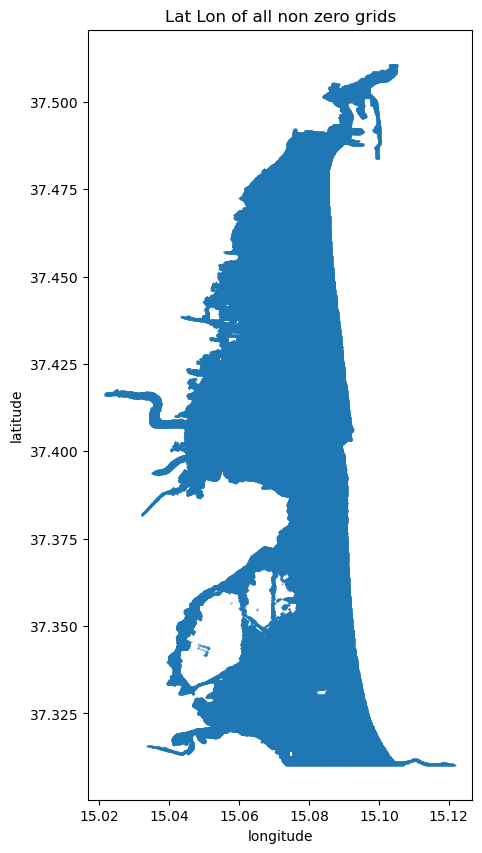

In [9]:

firstevent = np.loadtxt(f'{MLDir}/data/events/sample_events53550.txt',dtype='str')[0]
D_grids = xr.open_dataset(f'{SimDir}/{firstevent}/{reg}_flowdepth.nc')
zero_mask = np.load(f'{MLDir}/data/processed/zero_mask_{reg}_{mask_size}.npy')
non_zero_list = np.argwhere(~zero_mask).tolist()

#calculate lat lon for all non zero list
lat_list = []
lon_list = []
for idx in non_zero_list:
    lat_list.append(D_grids.lat.values[idx[0]])
    lon_list.append(D_grids.lon.values[idx[1]])

#combine lat,lon,idx into 3 column array
lat_lon_idx = np.column_stack((non_zero_list,lat_list,lon_list))

#plot the lat lon idx
plt.figure(figsize=(10,10))
plt.scatter(lat_lon_idx[:,3],lat_lon_idx[:,2],s=0.1)
plt.xlabel('longitude')
plt.ylabel('latitude')
#equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Lat Lon of all non zero grids')
plt.show()

# #save to processed folder
np.save(f'{MLDir}/data/processed/lat_lon_idx_{reg}_{mask_size}.npy',lat_lon_idx)

# #as txt
# np.savetxt(f'{MLDir}/data/processed/lat_lon_idx_{reg}_{mask_size}.txt',lat_lon_idx,fmt='%.5f',delimiter=',')


In [2]:
eve = 3224-1
print(np.loadtxt(f'{MLDir}/data/events/shuffled_events_test_{reg}_{size}.txt',dtype='str')[eve])
print(red_dZ_array.shape)
print(min(red_dZ_array[eve]),max(red_dZ_array[eve]))
print(red_dZ_array[0,:10])

print(red_d_array.shape)
print(min(red_d_array[eve]),max(red_d_array[eve]))
print(red_d_array[0,:10])


BS_manning003/E01267N3753E01646N3535-BS-M732_E01502N3737_D010_S202D50R090_A001180_S030
(6421, 594725)


-1.8165866136550903 0.5424582362174988
[0.67826349 0.67978942 0.67978942 0.67978942 0.67978942 0.67978942
 0.67978942 0.6813153  0.6813153  0.6813153 ]
(6421, 594725)
0.0 3.6570234298706055
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


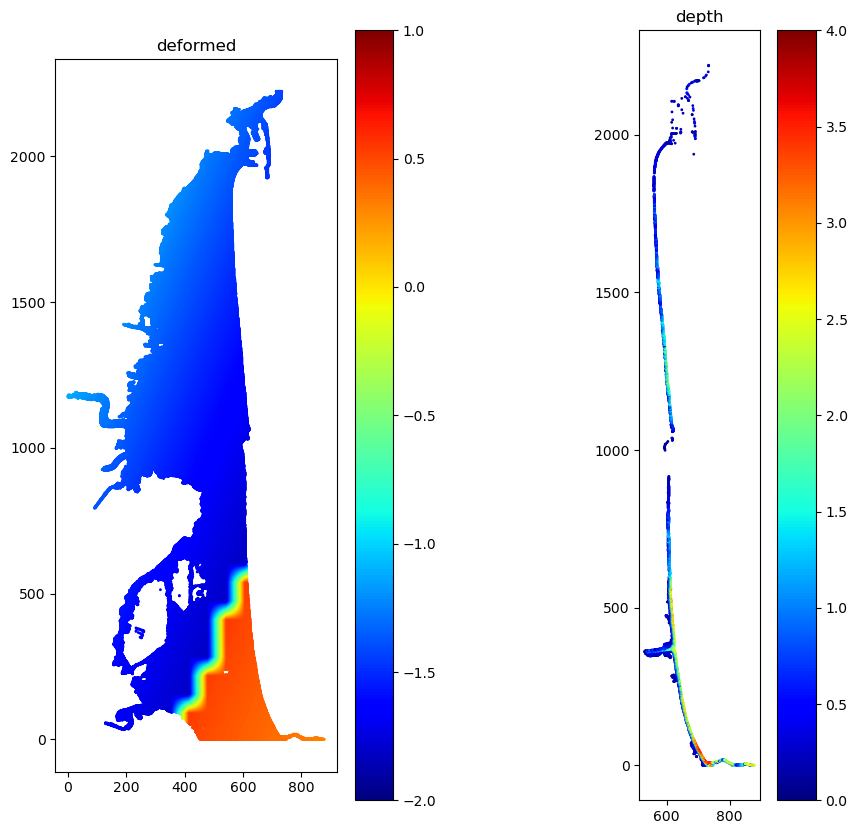

In [3]:
idx= np.load('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/processed/lat_lon_idx_CT_6317.npy')
#add recon and true column to to the idx array
idx = np.c_[idx,red_dZ_array[eve],red_d_array[eve]]

#plot the true and recon values on the map as color side by side using lat lon 

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.scatter(idx[:,1],idx[:,0],c=idx[:,4],s=1,cmap='jet')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('deformed')
plt.clim(-2,1)
plt.colorbar()
plt.subplot(1,2,2)
#set value below 0.1 as nan
idx[idx[:,5]<0.1,5] = np.nan
plt.scatter(idx[:,1],idx[:,0],c=idx[:,5],s=1,cmap='jet')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('depth')
plt.clim(0,4)
plt.colorbar()
plt.show()

Calculate flow depth from max_height and deformed elevation using predeformed land mask

0
plotting mask


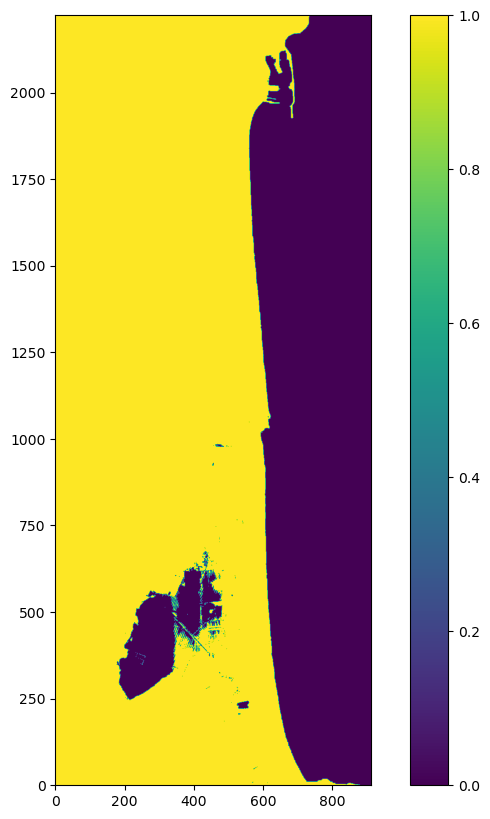

plotting max h


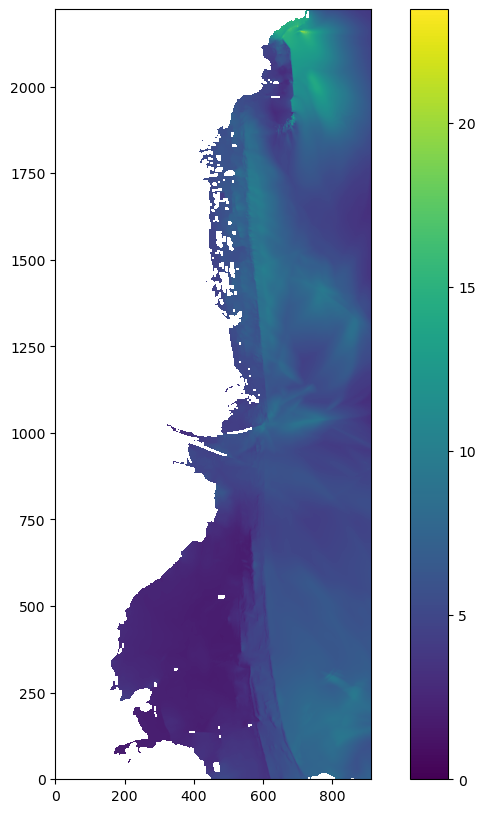

plotting new depth


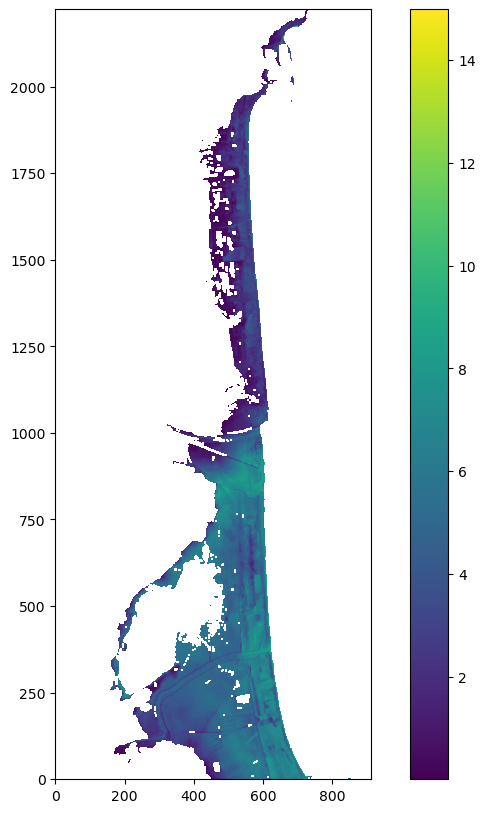

plotting old depth


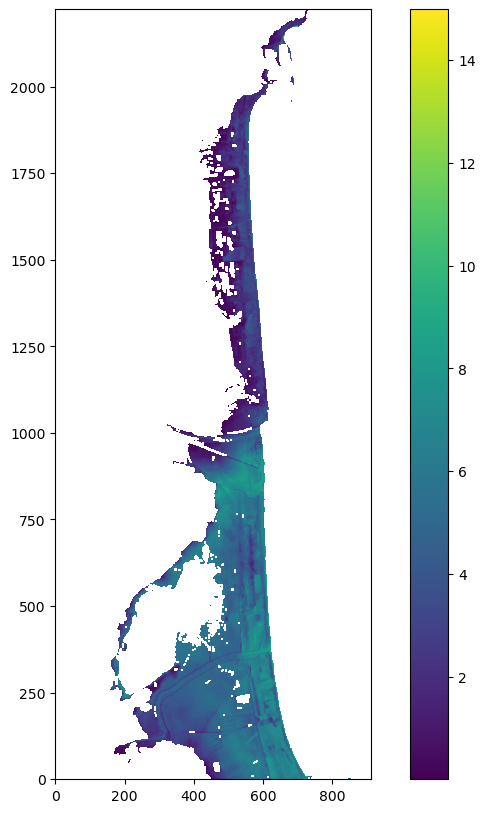

plotting difference


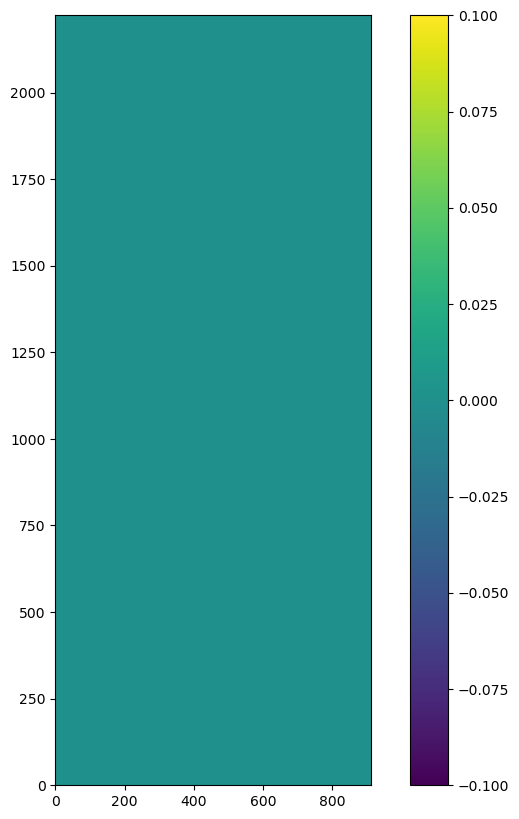

plotting mask


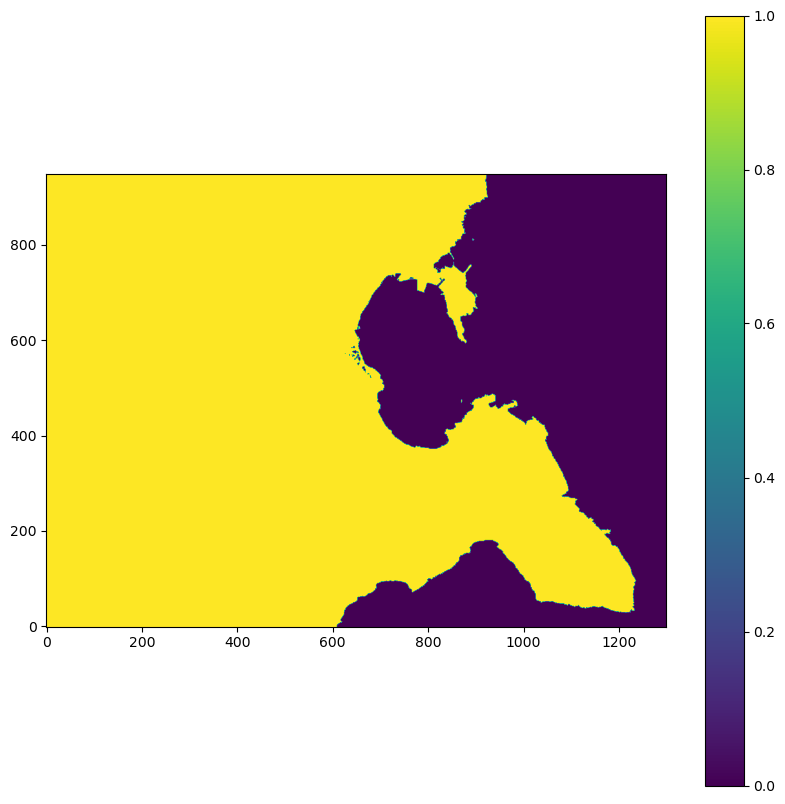

plotting max h


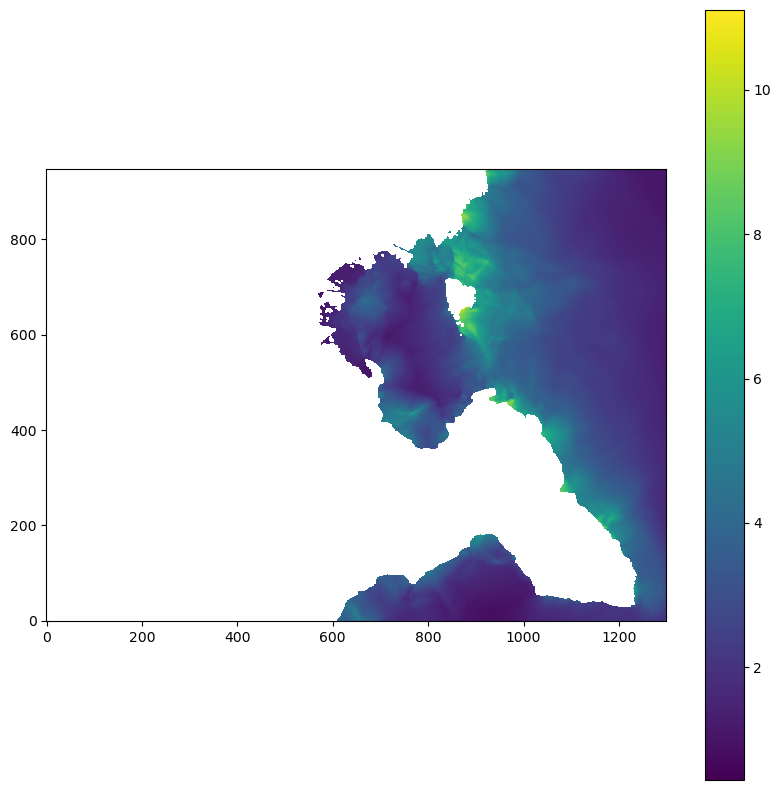

plotting new depth


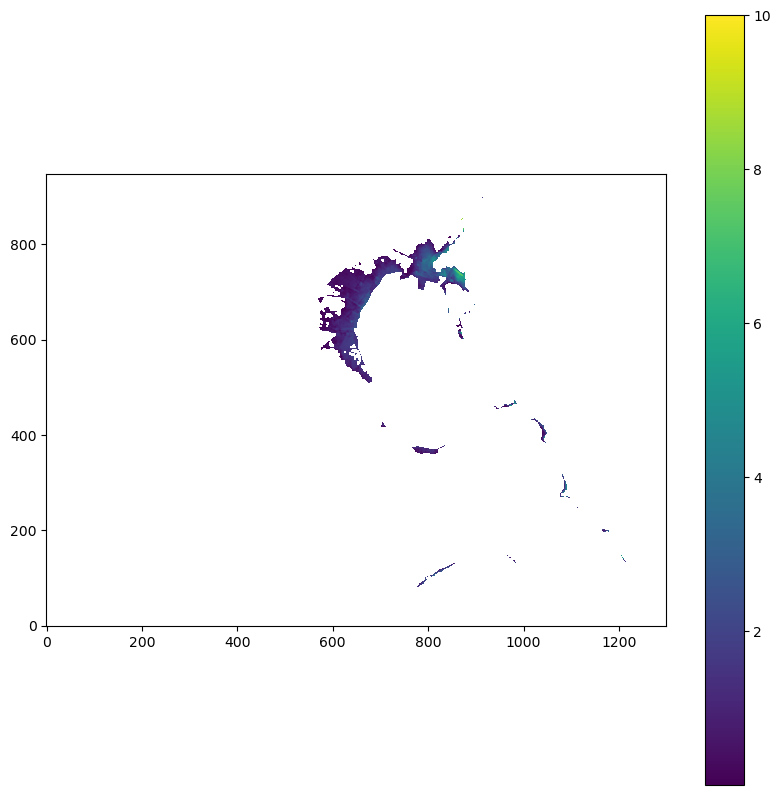

plotting old depth


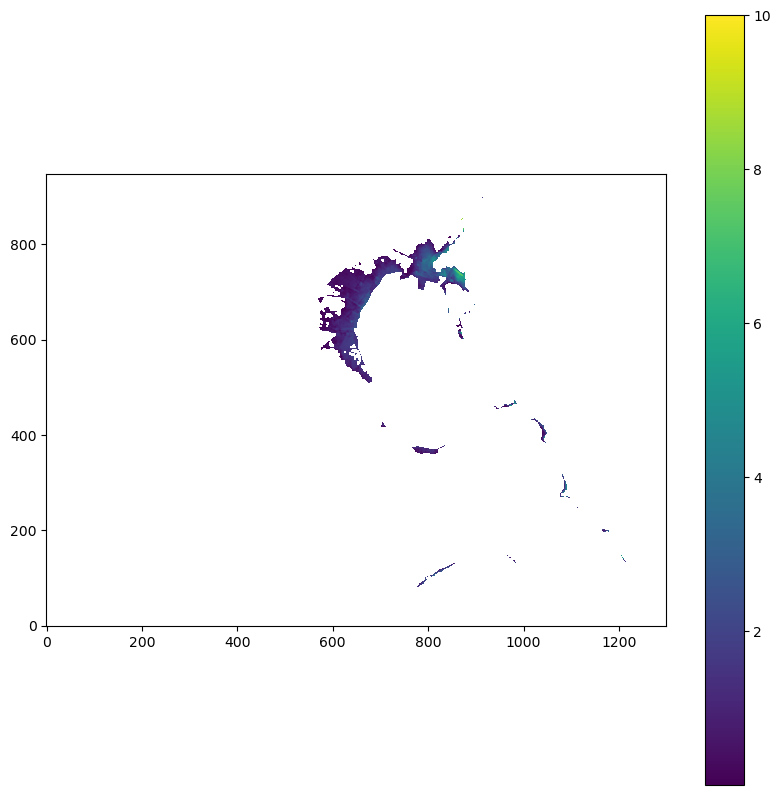

plotting difference


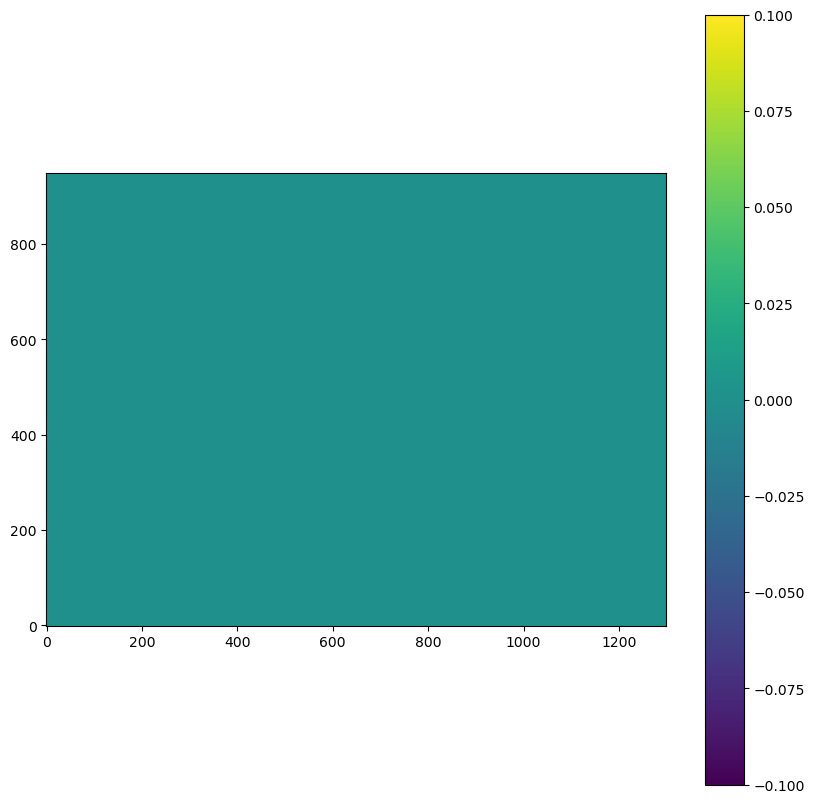

In [4]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

#netcdf file paths
IPath = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/{:s}/C_{:s}.nc' 
Opath = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/{:s}/{:s}_flowdepth2.nc'
OldPath = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/{:s}/{:s}_flowdepth.nc'
EPath = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/processed/{:s}_defbathy.nc' #predeformed elevation from event far from land

#event id list
event_list = np.loadtxt(f'/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/events/sample_events53550.txt', dtype='str')

event_list = ['BS_manning003/E01267N3753E01646N3535-BS-M809_E01470N3715_D010_S067D50R270_A006995_S075']
#regions to process
reg = ['CT','SR']

#read the file in one of the sim event folder
for i, event in enumerate(event_list): 
    if i%1000==0:
        print(i)
    for region in reg:
        #read the file

        Ifile = xr.open_dataset(IPath.format(event,region))
        Efile = xr.open_dataset(EPath.format(region))
        Ofile = xr.open_dataset(OldPath.format(event,region))
        #deformed elevation
        deformed_ele = Efile.z.values - Ifile.deformation.values

        #calculate depth from height and predeformed elevation

        depth = Ifile.max_height.values - deformed_ele
        depth = xr.DataArray(depth, dims=Ifile.max_height.dims, coords=Ifile.max_height.coords,name='z')

        #filter by masking on land values of predeformed elevation
        depth = depth.where(Efile.z.values>0) 
        # depth.to_netcdf(Opath.format(event,region),mode='w')

        #close files
        Ifile.close()
        Efile.close()
        # Ofile.close()

        #plot mask
        print('plotting mask')
        plt.figure(figsize=(10,10))
        plt.imshow(Efile.z.values>0)
        plt.gca().invert_yaxis()
        plt.colorbar()
        plt.show()

        #plot new depth
        print('plotting max h')
        plt.figure(figsize=(10,10))
        plt.imshow(Ifile.max_height.values)
        plt.gca().invert_yaxis()
        plt.colorbar()
        plt.show()


        #plot new depth
        print('plotting new depth')
        plt.figure(figsize=(10,10))
        plt.imshow(depth)
        plt.gca().invert_yaxis()
        plt.colorbar()
        plt.show()

        #plot old depth
        print('plotting old depth')
        plt.figure(figsize=(10,10))
        plt.imshow(Ofile.z.values)
        plt.gca().invert_yaxis()
        plt.colorbar()
        plt.show()

        #set nan values as 0 
        depth = depth.fillna(0)
        #for old depth set nan values as 0
        olddepth = Ofile.z.fillna(0)
        #plot difference
        print('plotting difference')
        plt.figure(figsize=(10,10))
        plt.imshow(depth.values-olddepth)
        plt.gca().invert_yaxis()
        plt.colorbar()
        plt.show()


plot numpy memmaps

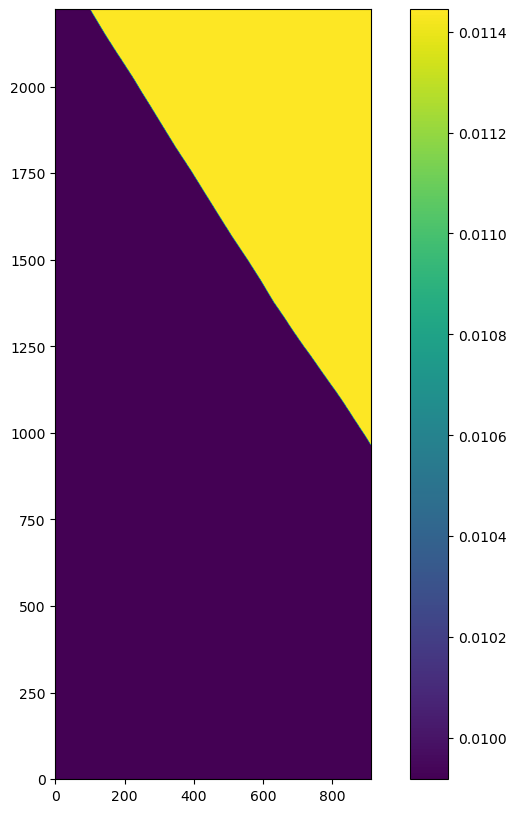

In [2]:
import numpy as np
import os
import xarray as xr
import matplotlib.pyplot as plt

size,n_eve = 6317,6315
GaugeNo = list(range(35,44)) #for Catania
x_dim = 912
y_dim = 2224
ts_dim = len(GaugeNo)
reg_gaugeno = str(38)
reg = 'CT'
pts_dim = 480

# Define the data path
MLDir = "/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/"
SimDir = "/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/"  

dZ_array = np.memmap(f'{MLDir}/data/processed/dZ_{reg}_{size}.dat',
                        mode='r',
                        dtype=float,
                        shape=(n_eve,y_dim,x_dim))

#read the data
t_array = np.memmap(f'{MLDir}/data/processed/t_{reg}_{size}.dat',
                        mode='r',
                        dtype=float,
                        shape=(n_eve, ts_dim, pts_dim))
eve = 588
#plot first event
plt.figure(figsize=(10,10))
plt.imshow(dZ_array[eve])
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

# #ts
# t_array = t_array[:,:,:]

# plt.figure(figsize=(10,3))
# for i in range(9):
#     plt.plot(np.abs(t_array[eve,i,:100]))
# plt.show()

# start_idx = start_idx = [np.where(np.abs(t_array[e, :, :]) > 0.1)[0][0] for e in range(n_eve)]
# print(start_idx[eve])

#find first index list crosses that satisfies threshold of +-0.1 for all events, using all 9 gauges
# start_idx = []
# for e in range(n_eve):
#     start_idx.append(np.argmax(np.any(np.abs(t_array[e,:,:]) > .1, axis=0)))
# print(start_idx[eve])
# np.argmax(np.abs(t_array[eve,3,:])>0.1)
# np.argmax(np.any(np.abs(t_array) > .1, axis=(1, 2)))




File copy


In [ ]:
import os
import sys
import numpy as np

#file path for region nc files
Ipath = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/{:s}/{:s}_flowdepth.nc'

#output destination for summary statistics
Opath = '/home/naveen.raguramalinga/test/{:s}/'

#Read event list from file
event_list = np.loadtxt(f'/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/events/sample_events53550.txt', dtype='str')

#loop over events to copy to new directory
#for CT and SR regions
for i, event in enumerate(event_list[:2]): 
    if i%1000 == 0:
        print(f'{i} events copied') 
    for reg in ['CT','SR']:
        #create directory
        os.system('mkdir -p '+Opath.format(event))
        #copy file
        os.system('cp ' + Ipath.format(event,reg) + ' ' + Opath.format(event))
           

PostProcessing

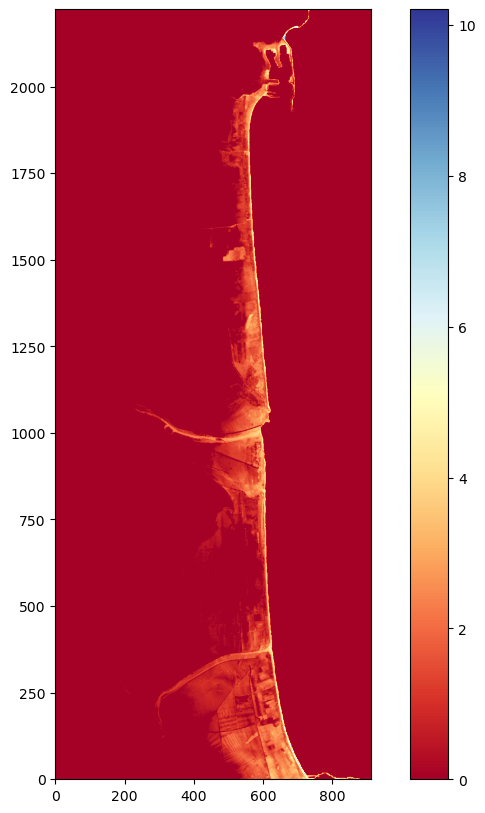


Number of Features: 895

size of labeled array: (2224, 912)

Unique Labels: 896

Labelled Map:


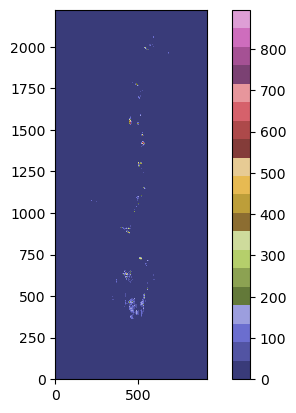


Thresh Size: (896,)

Mask Size: (896,)
values in filtered array: [0. 1.]

Filtered Map:


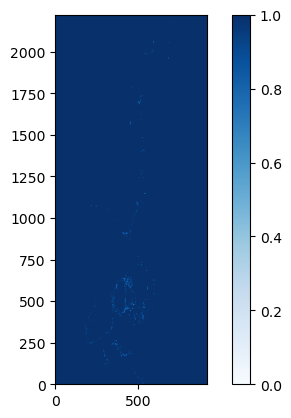

Original Map:

New Map:


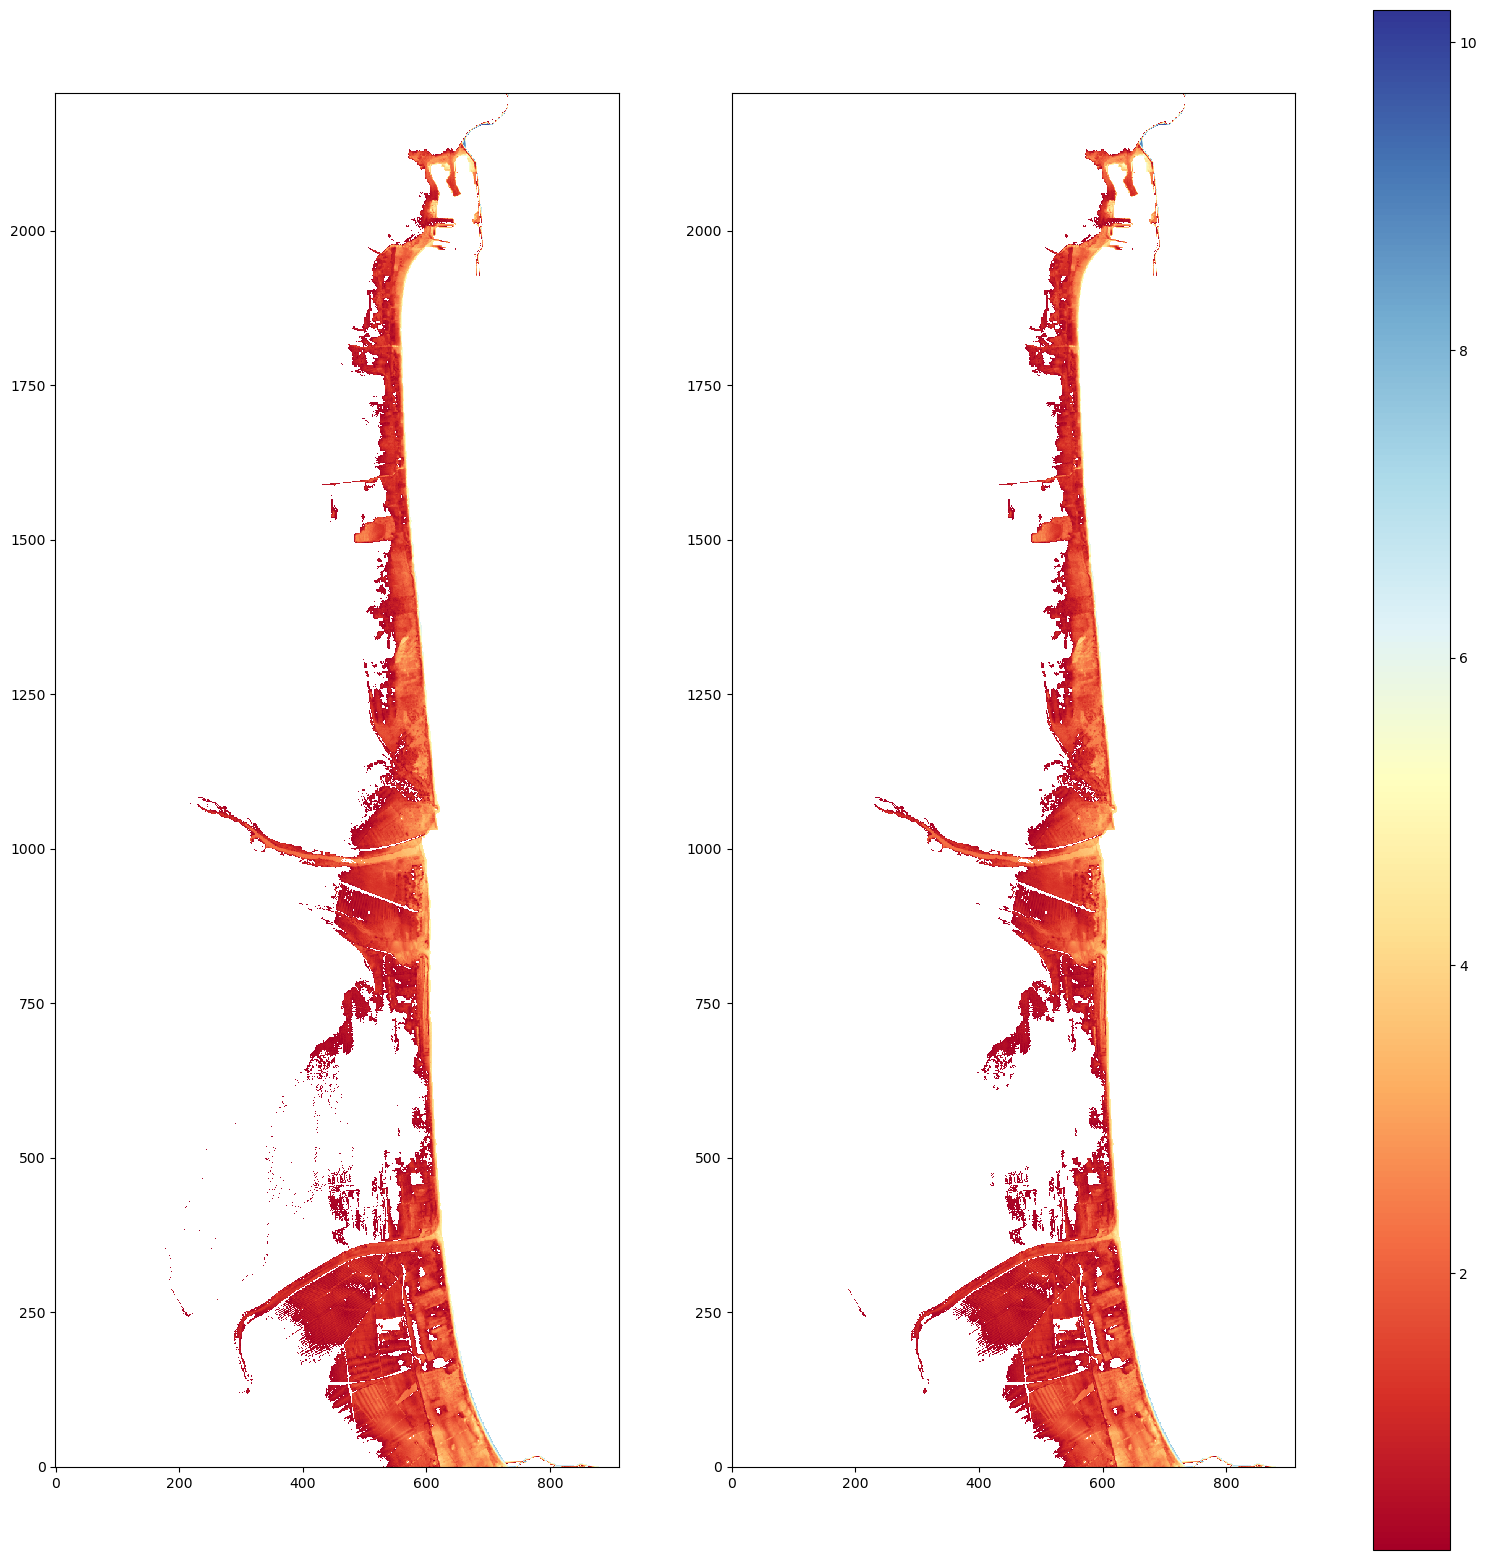

In [11]:
import numpy as np
from scipy.ndimage import label
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#steps for post processing npy files
#1. read the array file
#2. iterate over each event
#3. convert 1d to 2d array map using lat lon idx
#4. apply mask function to remove small components
#5. save the corrected array map as combined npy or individual netcdf file

#read array
map_array = np.load('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/scripts/testing/out/test_array_CT_0.npy')   

#read prediction array
zero_mask = np.load('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/processed/zero_mask_CT_1650.npy')
# map2d = np.zeros((map_array.shape[0], map_array.shape[1]))
# pred = np.load('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/CT/out/pred_trainsize1650_testsize3.npy')[7869]
# map2d[~zero_mask] = pred

# map_array[map_array<0.1] = np.nan

#plot the map
plt.figure(figsize=(10,10))
plt.imshow(map_array, cmap='RdYlBu')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

s = [[1,1,1],
     [1,1,1],
     [1,1,1]]

map_array[map_array<0.1] = 0

labeled_array, num_features = label(map_array,structure=s)
print("\nNumber of Features:", num_features)
print("\nsize of labeled array:", labeled_array.shape)

#number of unique labels in labeled array
print("\nUnique Labels:", len(np.unique(labeled_array)))

print("\nLabelled Map:")
plt.imshow(labeled_array, cmap='tab20b')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

component_sizes = np.bincount(labeled_array.flatten())
print("\nThresh Size:", component_sizes.shape)

min_area = 10
mask = component_sizes > min_area
print("\nMask Size:", mask.shape)

filtered_array = np.zeros_like(map_array)
filtered_array[np.isin(labeled_array, np.nonzero(mask))] = 1

print('values in filtered array:',np.unique(filtered_array)) #should be 0 and 1
#set filtered array as int
filtered_array = filtered_array.astype(int)

print("\nFiltered Map:")
#plot 0 and 1 map as black and red
plt.imshow(filtered_array, cmap='Blues')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

#plot original map and corrected maps side by side
fig = plt.figure(figsize=(20,40))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

map_array[map_array==0] = np.nan
print("Original Map:")
org = ax1.imshow(map_array, cmap='RdYlBu',interpolation='none')
ax1.invert_yaxis()

map_array[filtered_array==0] = np.nan
print("\nNew Map:")
post = ax2.imshow(map_array, cmap='RdYlBu',interpolation='none')
ax2.invert_yaxis()

#common colorbar
cbar = fig.colorbar(org, ax=[ax1,ax2], shrink=0.5)
plt.show()

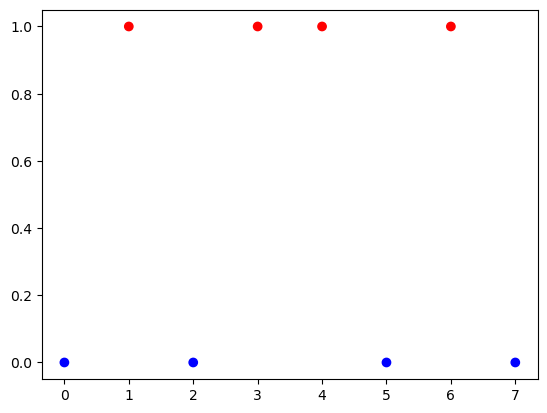

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define your two colors
color1 = 'blue'
color2 = 'red'

# Create a ListedColormap with the specified colors
cmap = ListedColormap([color1, color2])

# Example usage: plot some data with the custom colormap
data = [0, 1, 0, 1, 1, 0, 1, 0]

plt.scatter(range(len(data)), data, c=data, cmap=cmap)

# Show the plot
plt.show()


Fourier analysis for getting wave period

In [4]:
import pandas as pd
import numpy as np
import os
import glob
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib

sim_dir = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu'

reg = 'CT'
if reg == 'CT':
    eve_list = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/sampling_input_CT_38.csv'
elif reg == 'SR':
    eve_list = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/sampling_input_SR_54.csv'

#load file in pandas
eve = pd.read_csv(eve_list,sep = ',')
eve_row = 878 #starts from 0
eve_id = eve['id'][eve_row]

# eve_id = 'BS_manning003/E01267N3753E01646N3535-BS-M732_E01502N3737_D010_S202D50R090_A001180_S030'
eve_id = 'PS_manning003/E02020N3739E02658N3366-PS-Mur_PYes_Hom-M880_E02229N3514_S005'

# #read the file in one of the sim event folder
eve_path = os.path.join(sim_dir,eve_id)
# file_list = glob.glob(eve_path + '/*.nc')
# file_list.sort()
# print(*file_list,sep = "\n")
# print('')
# for i in range(len(file_list)):
#     print(file_list[i])
#     ds = xr.open_dataset(file_list[i])
#     print(ds)

ds = xr.open_dataset(eve_path + '/grid0_ts.nc')


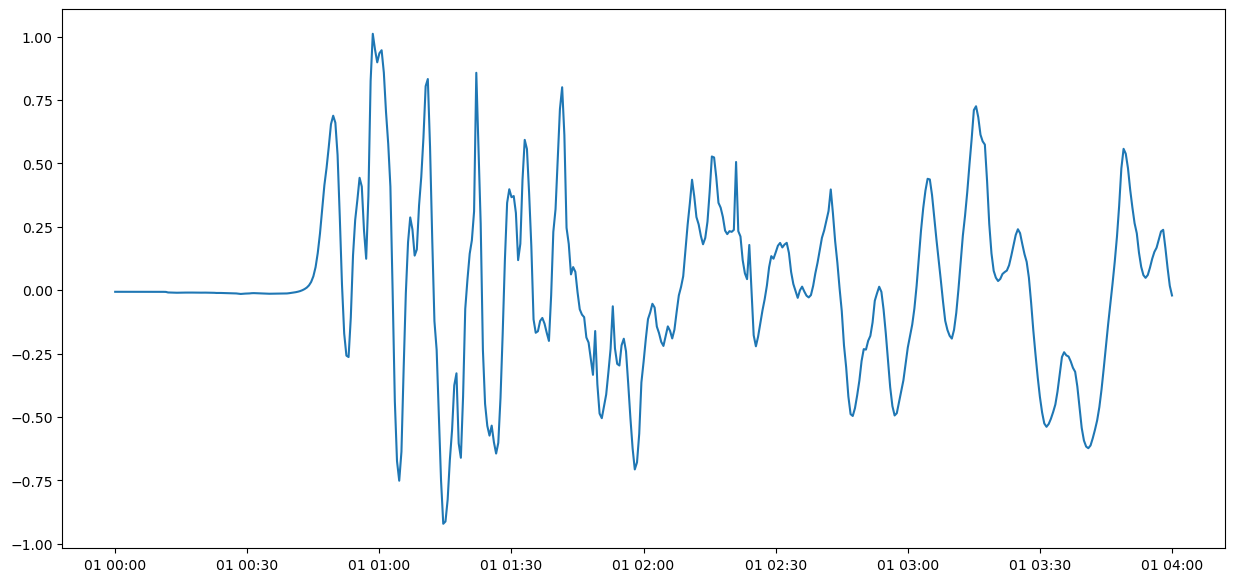

In [5]:
plt.figure(figsize=(15, 7))
plt.plot(ds.time,ds.eta[:,39],label = f'loc:{0}')   #41 is the location of Catania #54 is the location of Siracusa


Use fft to get wave spectra and peak wave period

/tmp/ipykernel_1725508/1325257984.py:24: RuntimeWarning: divide by zero encountered in divide
  wave_period_minutes = 1 / np.abs(freqs)  # Compute wave period in minutes


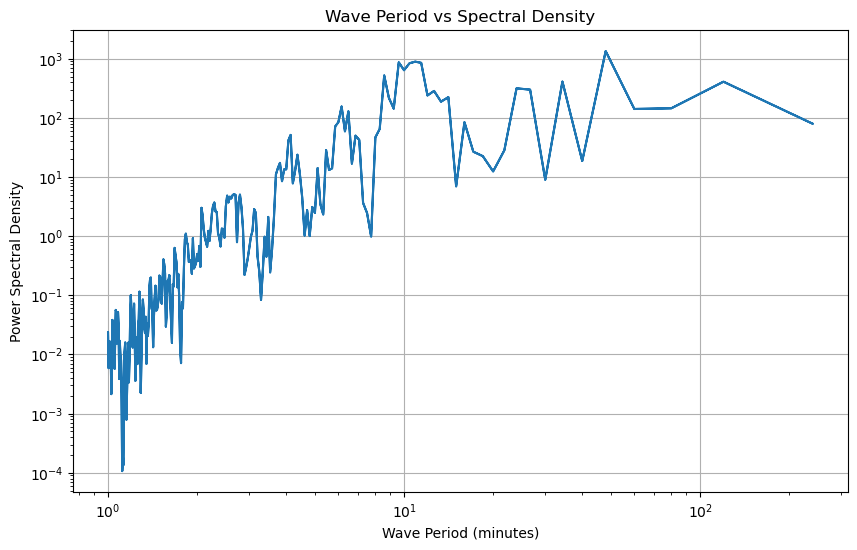

The wave period with maximum spectral density is 48.00 minutes


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Assuming you have your tsunami waveform data stored in an array called 'tsunami_data'
tsunami_data = ds.eta[1:,45].values  # Your tsunami waveform data
# Assuming the sampling rate of the data is 6 minutes

# Define the time range for the entire dataset (600 minutes)
total_time_minutes = 240
time_step_minutes = 0.5

# Compute the time array
time = np.arange(0, total_time_minutes, time_step_minutes)

# Perform Fourier analysis on the tsunami data using scipy.fft
fft_tsunami_data = fft(tsunami_data)
freqs = fftfreq(len(time), d=time_step_minutes)

# Compute the power spectral density (PSD)
psd = np.abs(fft_tsunami_data) ** 2

# Plot the wave period vs spectral density
wave_period_minutes = 1 / np.abs(freqs)  # Compute wave period in minutes
plt.figure(figsize=(10, 6))
plt.plot(wave_period_minutes, psd)
plt.xlabel('Wave Period (minutes)')
plt.ylabel('Power Spectral Density')
plt.title('Wave Period vs Spectral Density')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

#print the wave period with max spectral density
max_psd_idx = np.argmax(psd)
max_wave_period = 1/freqs[max_psd_idx]

print(f'The wave period with maximum spectral density is {max_wave_period:.2f} minutes')

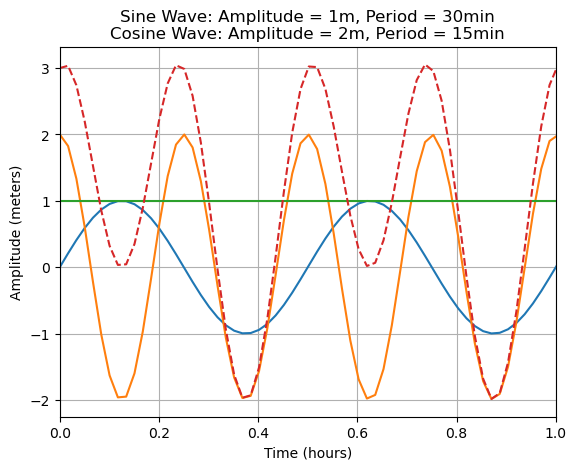

/tmp/ipykernel_3976865/1125772494.py:52: RuntimeWarning: divide by zero encountered in divide
  wave_period = 1 / np.abs(freqs)  # Compute wave period


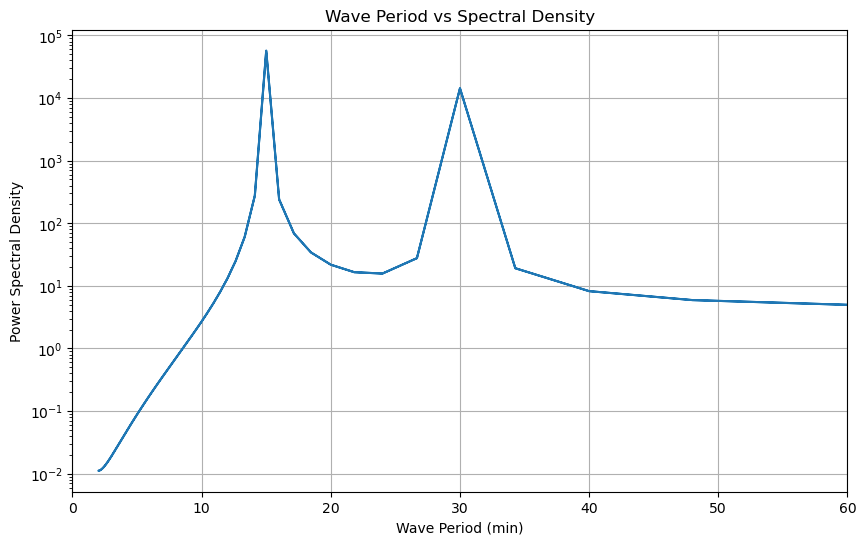

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Define parameters
amplitude = 1  # Amplitude in meters
period1 = 30  # Period in minutes
period2 = 15  # Period in minutes
duration_hours = 4
sampling_rate = 1  # Sampling rate in samples per minute

# Convert period from minutes to hours
period_hours1 = period1 / 60
period_hours2 = period2 / 60

# Calculate the number of samples
num_samples = int(duration_hours * 60 * sampling_rate)

# Generate time values
time = np.linspace(0, duration_hours, num_samples)

# Generate the sine wave
#formula for sine wave: y = A * sin(2 * pi * f * t)
#formula for cosine wave: y = A * cos(2 * pi * f * t)
#where A is the amplitude, f is the frequency, and t is the time
#f = 1/T where T is the period of the wave
sine_wave = amplitude * np.sin(2 * np.pi * time / period_hours1) # Sine wave 30 min period
cos_wave = amplitude*2 * np.cos(2 * np.pi * time / period_hours2) # Cosine wave 15 min period
flat_wave = np.ones_like(time)  # Flat line
combined_wave = sine_wave + cos_wave + flat_wave
# Plot the sine wave
plt.plot(time, sine_wave, label='Sine Wave')
plt.plot(time, cos_wave, label='Cosine Wave')
plt.plot(time, flat_wave, label='Flat Line')
plt.plot(time, combined_wave, label='Combined Wave', linestyle='--')
plt.title('Sine Wave: Amplitude = 1m, Period = 30min\nCosine Wave: Amplitude = 2m, Period = 15min')
plt.xlabel('Time (hours)')
plt.ylabel('Amplitude (meters)')
plt.xlim(0, 1)
plt.grid(True)
plt.show()


# Perform Fourier analysis on the combined wave using scipy.fft
fft_combined_wave = fft(combined_wave)
freqs = fftfreq(len(time), d=1)  # Compute the frequency array

# Compute the power spectral density (PSD)
psd = np.abs(fft_combined_wave) ** 2

# Plot the wave period vs spectral density
wave_period = 1 / np.abs(freqs)  # Compute wave period

plt.figure(figsize=(10, 6))
plt.plot(wave_period, psd)
plt.xlabel('Wave Period (min)')
plt.ylabel('Power Spectral Density')
plt.title('Wave Period vs Spectral Density')
plt.grid(True)
plt.xlim(0, 60)
plt.yscale('log')
plt.show()

PTHA


In [1]:
from sklearn.metrics import r2_score
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contextily as cx
import torch

#select particular representative gauge
reg = 'CT'
if reg == 'SR':
    columnname = str(54)
    train_size = '1783'#'6648'
    mask_size = '1783'
elif reg == 'CT':
    columnname = str(38)
    train_size = '1650'#'6091'
    mask_size = '1650'

#read combined dataframe
MLDir = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami' 
eve_perf = pd.read_csv(f'{MLDir}/model/{reg}/results/model_coupled_off[64, 128, 256]_on[16, 128, 128]_{train_size}_compile_combined.csv')
eve_dep = pd.read_csv(f'{MLDir}/model/{reg}/results/model_coupled_off[64, 128, 256]_on[16, 128, 128]_{train_size}_true_pred_er_combined.csv')

In [3]:
def exceedance_curve(thresholds, max_stage_point, rates): 
   # Annual Mean Rate of threshold exceedance 
   lambda_exc = np.zeros((len(thresholds), 1000)) 
   for threshold in range(len(thresholds)): 
       ix = np.array(np.where(max_stage_point > thresholds[threshold])).squeeze() 
       for j in range(1000): 
           #for index in ix: 
           lambda_exc[threshold, j] = lambda_exc[threshold, j] +  rates[ix,j].sum(axis=0) 
   #------------------------------------------------ 
   return lambda_exc 

def single_exceedance_curve(thresholds, max_stage_point, rates): 
   # Annual Mean Rate of threshold exceedance 
   lambda_exc = np.zeros((len(thresholds), )) 
   for threshold in range(len(thresholds)): 
       ix = np.array(np.where(max_stage_point > thresholds[threshold])).squeeze() 
       #for index in ix: 
       lambda_exc[threshold] = lambda_exc[threshold] +  rates[ix].sum(axis=0) 
   #------------------------------------------------ 
   return lambda_exc

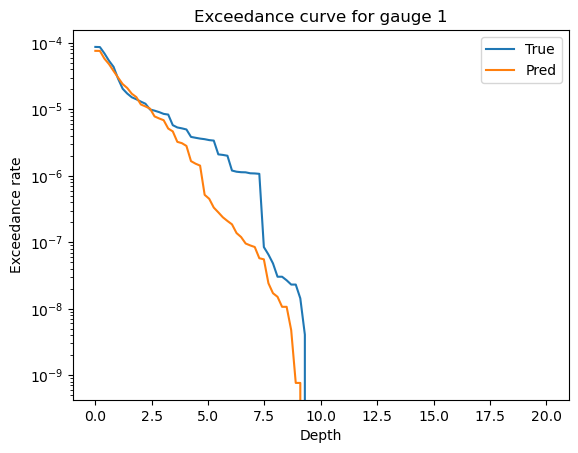

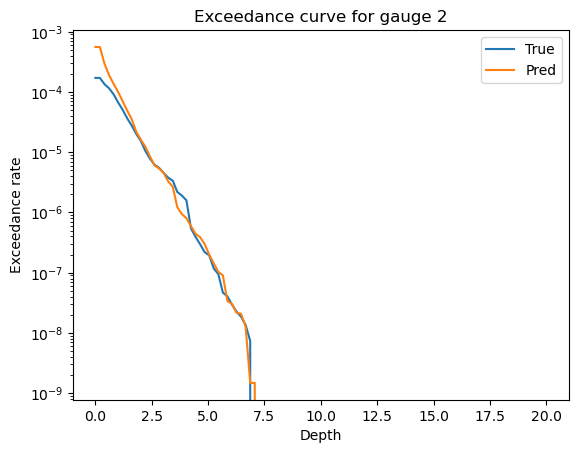

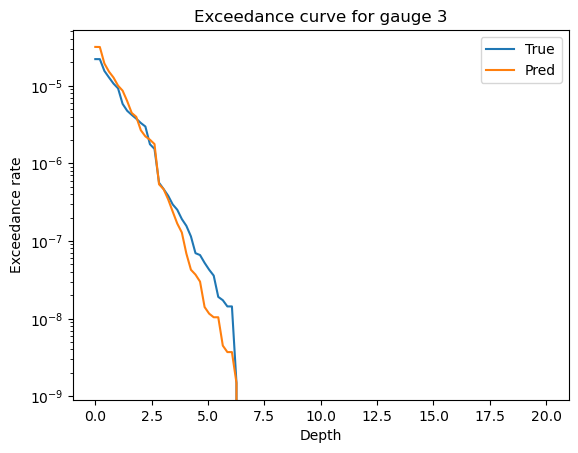

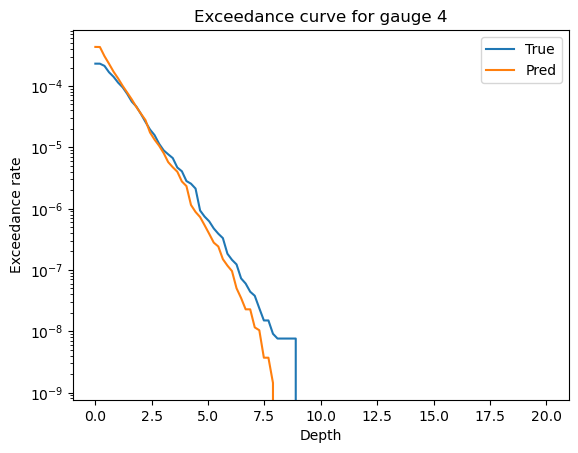

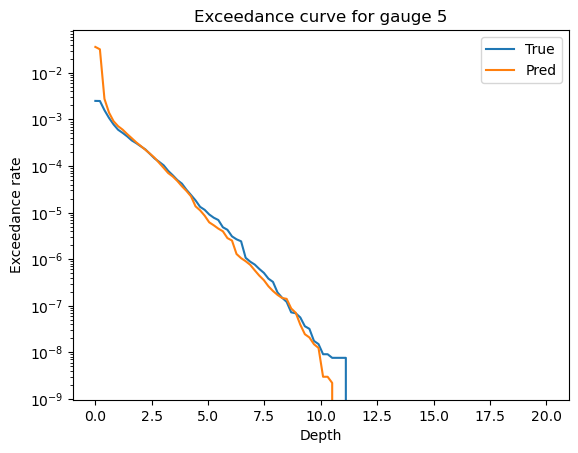

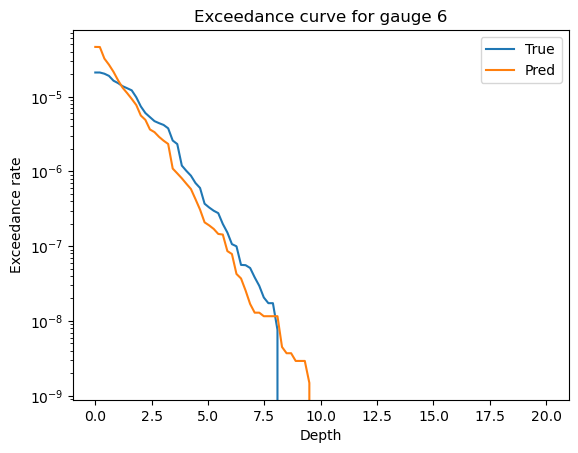

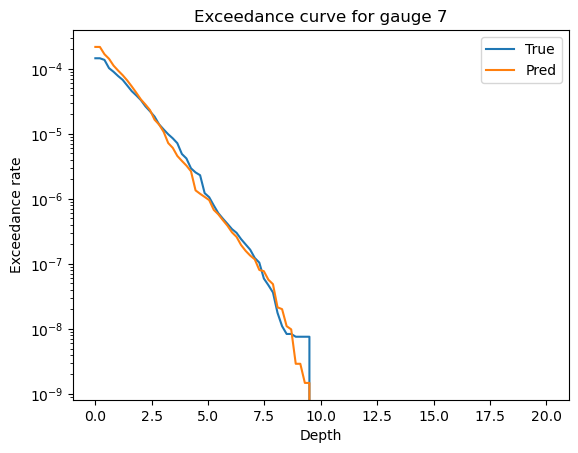

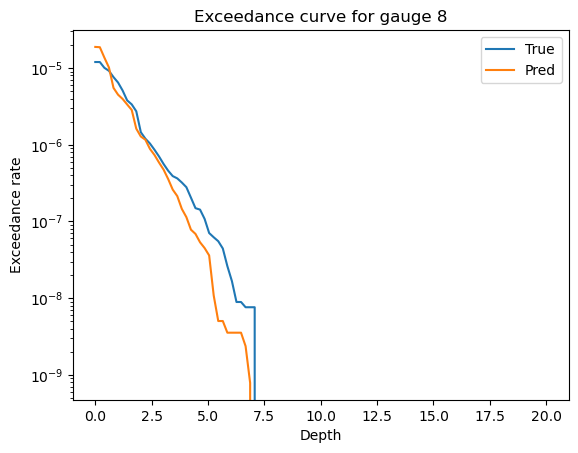

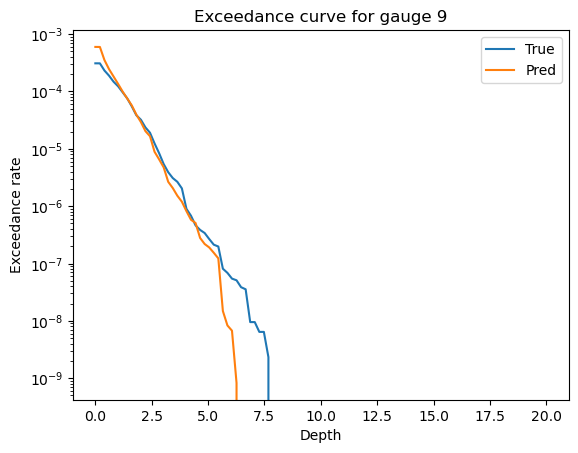

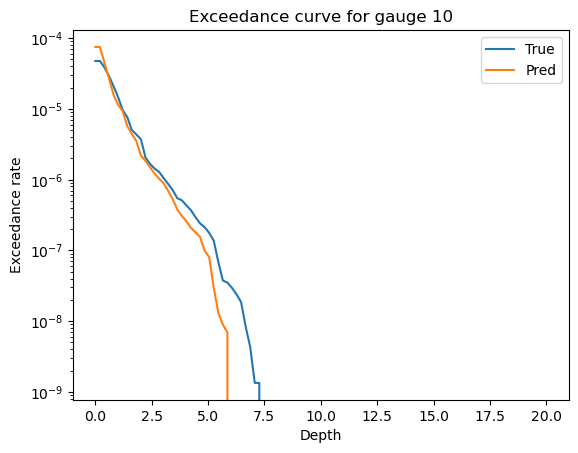

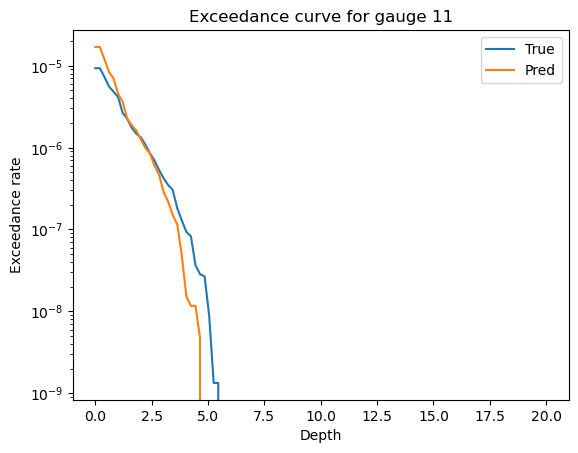

In [3]:
#iterate over points
for select_pt in range(1, 12):
    select_pt = str(select_pt)
    true = eve_dep['T'+select_pt].values
    pred = eve_dep['P'+select_pt].values
    rate = eve_perf['mean_prob'].values

    #compute depth thresholds 
    thresholds_depth = np.linspace(0, 20, 100)

    #compute exceedance curve for true
    lambda_exc_true = single_exceedance_curve(thresholds_depth, true, rate)
    lambda_exc_pred = single_exceedance_curve(thresholds_depth, pred, rate)
    #plot exceedance curve
    plt.figure()
    plt.plot(thresholds_depth,lambda_exc_true, label='True')
    plt.plot(thresholds_depth,lambda_exc_pred, label='Pred')
    plt.xlabel('Depth')
    plt.ylabel('Exceedance rate')
    plt.yscale('log')
    #fix y axis limits
    # plt.ylim(1e-6, 1)
    plt.legend()
    plt.title(f'Exceedance curve for gauge {select_pt}')
    plt.show()


Load as memmap and as torch tensor

In [ ]:
test_list = ['0','1','2','3']
flood_mask = ~np.load(f'{MLDir}/data/processed/zero_mask_{reg}_{mask_size}.npy')
nflood_grids = np.count_nonzero(flood_mask)

for test_size in test_list:
    print(f'Processing test size {test_size}')
    # load test events related parameters
    event_list_path = f'{MLDir}/data/events/shuffled_events_test_{reg}_{test_size}.txt'
    event_list = np.loadtxt(event_list_path, dtype='str')
    n_eve = len(event_list)    
    true_d_array = np.memmap(f'{MLDir}/data/processed/dflat_{reg}_{test_size}.dat',
                            mode='r',
                            dtype=float,
                            shape=(n_eve, nflood_grids))
    pred_d_array = np.memmap(f'{MLDir}/data/processed/dflat_{reg}_{test_size}_{train_size}_prediction.dat',
                            mode='r',
                            dtype=float,
                            shape=(n_eve, nflood_grids))    

    true = torch.tensor(true_d_array*100,dtype=torch.int8)
    pred = torch.tensor(pred_d_array*100,dtype=torch.int8)
    #append events along first axis
    if test_size == '0':
        true_d = true
        pred_d = pred
    else:
        true_d = torch.cat((true_d,true),0)
        pred_d = torch.cat((pred_d,pred),0)

Read processed int numpy arrays

In [2]:
true = np.load(f'{MLDir}/model/{reg}/PTHA/true_d_1650.npy')
# pred = np.load(f'{MLDir}/model/{reg}/PTHA/pred_d_1650.npy')

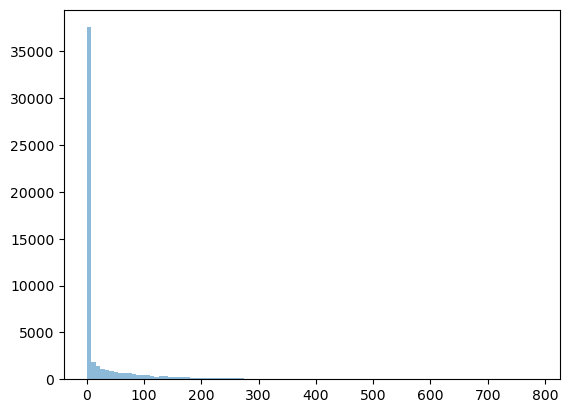

In [5]:
plt.hist(true[:,233614], bins=100, alpha=0.5, label='True')
#save as txt
np.savetxt(f'{MLDir}/model/{reg}/PTHA/true_d_1650_pt9.txt',true[:,233614],fmt='%d',delimiter=',')


In [ ]:
#compute depth thresholds 
rate = eve_perf['mean_prob']
thresholds_depth = np.linspace(0, 20, 100)
PTHA_table_true = np.zeros((nflood_grids,len(thresholds_depth)))
PTHA_table_pred = np.zeros((nflood_grids,len(thresholds_depth)))

for select_pt in range(len(nflood_grids)):

    #compute exceedance curve for true
    lambda_exc_true = single_exceedance_curve(thresholds_depth, true[:,select_pt], rate)
    lambda_exc_pred = single_exceedance_curve(thresholds_depth, pred[:,select_pt], rate)

    PTHA_table_true[select_pt] = lambda_exc_true
    PTHA_table_pred[select_pt] = lambda_exc_pred

    #plot exceedance curve
    plt.figure()
    plt.plot(thresholds_depth,lambda_exc_true, label='True')
    plt.plot(thresholds_depth,lambda_exc_pred, label='Pred')
    plt.xlabel('Depth')
    plt.ylabel('Exceedance rate')
    plt.yscale('log')
    #fix y axis limits
    # plt.ylim(1e-6, 1)
    plt.legend()
    plt.title(f'Exceedance curve for gauge {select_pt}')
    #plt.savefig(f'{MLDir}/model/{reg}/results/exceedance_curve_{select_pt}.png')
    plt.show()